## 機械学習の例
### 教師なし学習の例
それぞれの手書き文字の画像は、8x8=64ピクセルの濃淡でできているので、64次元のベクトルとみなせる。これを、多様体学習と呼ばれる手法を用い、2次元に落としこむ。コンピュータはこのデータが6種類の数字でできていることは知らない。64次元空間で近い点(似た画像)は、2次元空間でも近くなるように、射影される。(実際の計算時間は瞬時)

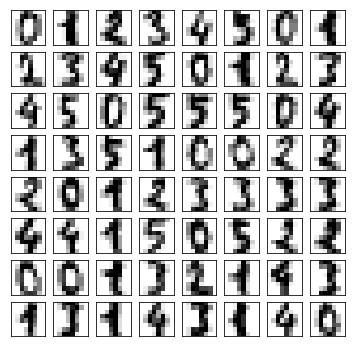

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 画像データの読みこみ
digits = load_digits(n_class=6)

# 画像データの表示
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

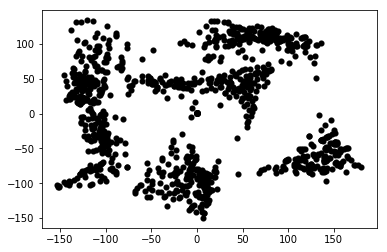

In [6]:
# IsoMap (多様体学習の一手法； 次元を削減し、データの構造を明らかにする)
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 結果の描画
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c='black')

それぞれの画像がどの数字を示しているかという情報もデータに含まれているが、コンピュータはそれを使わずにマッピングを行った。

その結果に対し、文字の種類ごとに異なる色を彩色してやると、6種類の文字が異なる島に分かれている=識別されていることがわかる。この例では、先験的な知識なしに、プログラムが文字をその形だけで分類できることを示している。

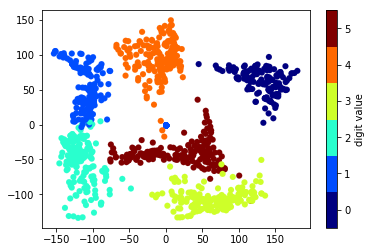

In [16]:
# 文字の種類ごとに異なる色を付けて描画
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

ひとたびこのようなテリトリーの地図が得られると、未知の手書き文字を同じようにこの地図にのせることで、それがどの文字に一番近いかを「認識」できるようになる。

## 参考資料

* Pythonデータサイエンスハンドブック
* パターン認識と機械学習